In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('income.csv')
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [5]:
scaler=MinMaxScaler()
scaler.fit(data[['Income($)']])
data['Income($)']=scaler.transform(data[['Income($)']])
data['Age']=scaler.fit_transform(data[['Age']])


In [6]:
data

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


In [11]:
km=KMeans(n_clusters=3)
# km.fit(data[['Age','Income($)']])
ypred=km.fit_predict(data[['Age','Income($)']])

c:\Users\91999\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
ypred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [16]:
data['cluster']=ypred
data

,Name,Age,Income($),clusters,cluster
0,Rob,0.058824,0.213675,1,1
1,Michael,0.176471,0.384615,1,1
2,Mohan,0.176471,0.136752,1,1
3,Ismail,0.117647,0.128205,1,1
4,Kory,0.941176,0.897436,0,0
5,Gautam,0.764706,0.940171,0,0
6,David,0.882353,0.982906,0,0
7,Andrea,0.705882,1.000000,0,0
8,Brad,0.588235,0.948718,0,0
9,Angelina,0.529412,0.726496,0,0


In [18]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

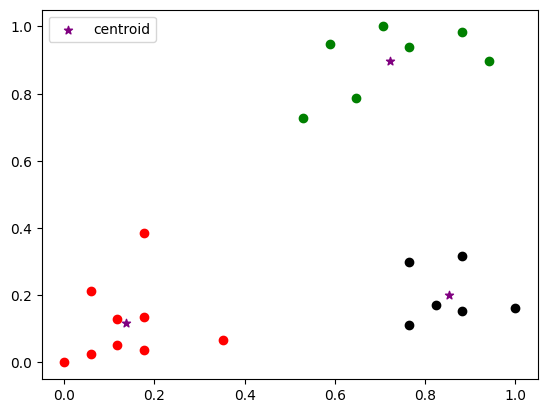

In [17]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]
plt.scatter(data1.Age,data1['Income($)'],color='green')
plt.scatter(data2.Age,data2['Income($)'],color='red')
plt.scatter(data3.Age,data3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [19]:
list=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit(data[['Age','Income($)']])
    list.append(km.inertia_)
list

c:\Users\91999\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\91999\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\91999\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\91999\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

[5.434011511988176,
 2.091136388699076,
 0.4750783498553094,
 0.34910470944195643,
 0.28716419494836826,
 0.21878010893330446,
 0.1867433613211864,
 0.14072448985352304,
 0.10188787724979426]

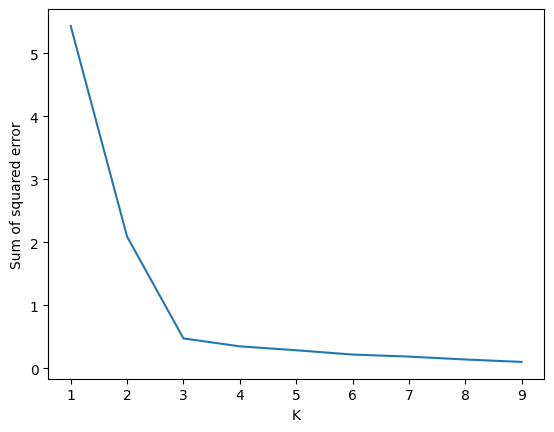

In [20]:
x_axis=range(1,10)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(x_axis,list)